**Overview**

Quantum computing describes the process of information processing using quantum mechanics instead of classical computers. A fundamental component of this is the quantum circuit. A quantum circuit is a computational arrangement that performs specific quantum operations. This circuit performs computations by utilizing a sequence of operations called quantum gates. Additionally, it can be synchronized with real-time classical computations. These circuits, used to process quantum data, can solve any quantum computing problem using a universally accepted set of operations. As a result, quantum programs are expressed as a combination of such quantum circuits and sometimes classical computations.

In Qiskit, this fundamental element is represented by the **QuantumCircuit** class.

**1. QuantumCircuit**

--------------

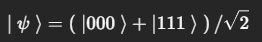

Yukarıda böyle verilen bir durum olsun, biz de bu durumu Qiskit kullanarak kodlamaya çalışalim. 

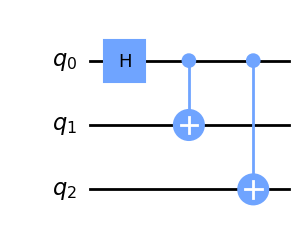

In [2]:
# 1. Let's Add Libraries..
from qiskit import QuantumCircuit

# 2. Since 3 Qubits are seen here, let's add 3 Qubits..
circ = QuantumCircuit(3)

# 3. # In Example 3, We Can Understand That It Is In Superposition. 
# So Let's Put the Example in Superposition.
# Let's Build a Hadamard Gate for This. We put this in the 0.
# Start Qubit so that we can change it after starting.
circ.h(0)

# 4. Then let's set up a CX Gate to change the values from 0 to 1.
# This process is a gate that creates the Bell state.
# The Bell state is a special quantum connection between two qubits.
circ.cx(0, 1)

#5. Let's Build Another CX Gate So That The Other Qubit Can Change.
# This process creates the GHZ (Greenberger-Horne-Zeilinger) state. 
circ.cx(0, 2)

# Draw the circuit
circ.draw('mpl')


# CX gate is installed as many Qubits minus 1.

**2.Quantum Circuit with conditional statements**

If we want to direct quantum operations of classical information and implement the relevant quantum gates in cases that meet certain conditions, we use the **c_if()** structure.

Let's discuss this in the following steps.

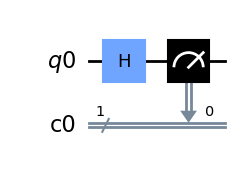

In [3]:
# 1. Let's Add Libraries..
from qiskit import BasicAer, transpile, QuantumRegister, ClassicalRegister, QuantumCircuit

# 2. Lets Define Our Circuit. 
qr = QuantumRegister(1) # 1 Qubit
cr = ClassicalRegister(1) # 1 Bit
qc = QuantumCircuit(qr, cr)
qc.h(0) # Hadamard Gate
qc.measure(0, 0) # Measure
qc.draw('mpl')

In [4]:
backend = BasicAer.get_backend('qasm_simulator') #Simülatör
tqc = transpile(qc, backend)
counts = backend.run(tqc).result().get_counts() #Kaç defa ne ölçtü..
 
print(counts)

# The result is quite normal. The Hadamard gate split the odds.
# He put 0 and 1 in superposition, that is, with equal probability!.


{'1': 504, '0': 520}


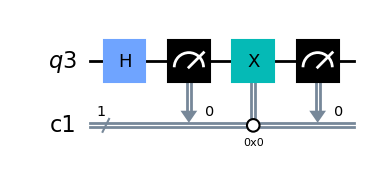

In [5]:
from qiskit import BasicAer, transpile, QuantumRegister, ClassicalRegister, QuantumCircuit
 
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 0)
 
qc.x(0).c_if(cr, 0)
qc.measure(0, 0)
 
qc.draw('mpl')

What needs to be changed here is the **c_if** command.

* **(qc.x(0).c_if(cr, 0)).** This checks the value of the classic register. If the value of the classical register is 0, gate X is applied. That is, if the previous measurement result is 0, this step works, otherwise it does not work.

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
tqc = transpile(qc, backend)
counts = backend.run(tqc).result().get_counts()
 
print(counts)

{'1': 1024}
